In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../data/_data.csv')
df.head()


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


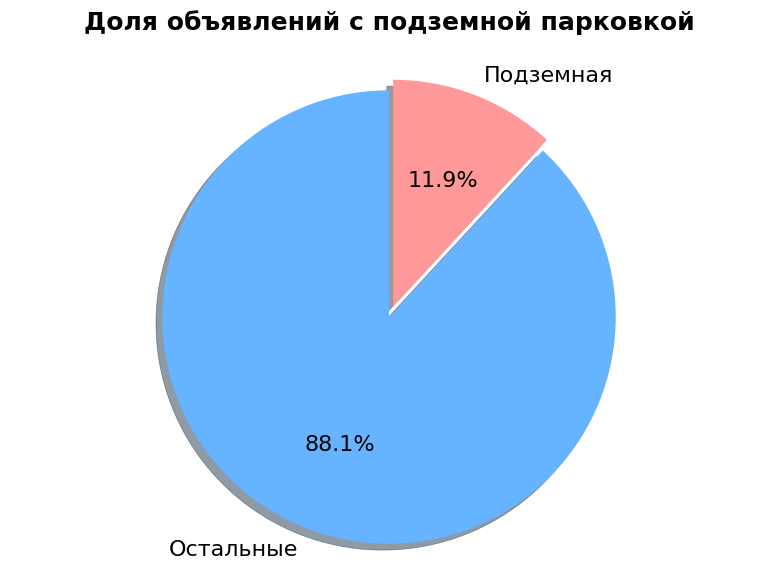

In [53]:
# Анализ столбца "Парковки". Доля подземных относительно общего кол-ва.

plt.rcParams['font.size'] = 14  # Увеличиваем размер шрифта

# Разделяем на "Подземная" и "Другие"
df["Тип парковки"] = df["Парковка"].apply(lambda x: "Подземная" if x == "подземная" else "Остальные")

# Считаем количество
counts = df["Тип парковки"].value_counts()

# Цвета (можно изменить)
colors = ["#66b3ff", "#ff9999"]
explode = (0.05, 0)  # Выделяем "Подземную" парковку

# Строим круговую диаграмму
plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,  # Тень для объема
    textprops={'fontsize': 16}  # Размер текста в процентах
)

# Добавляем заголовок
plt.title(
    "Доля объявлений с подземной парковкой", 
    fontsize=18, 
    pad=20,  # Отступ заголовка
    fontweight="bold"
)

# Убираем оси
plt.axis("equal")

plt.tight_layout()  # Автоматическая настройка отступов
plt.savefig('1.svg')
plt.show()


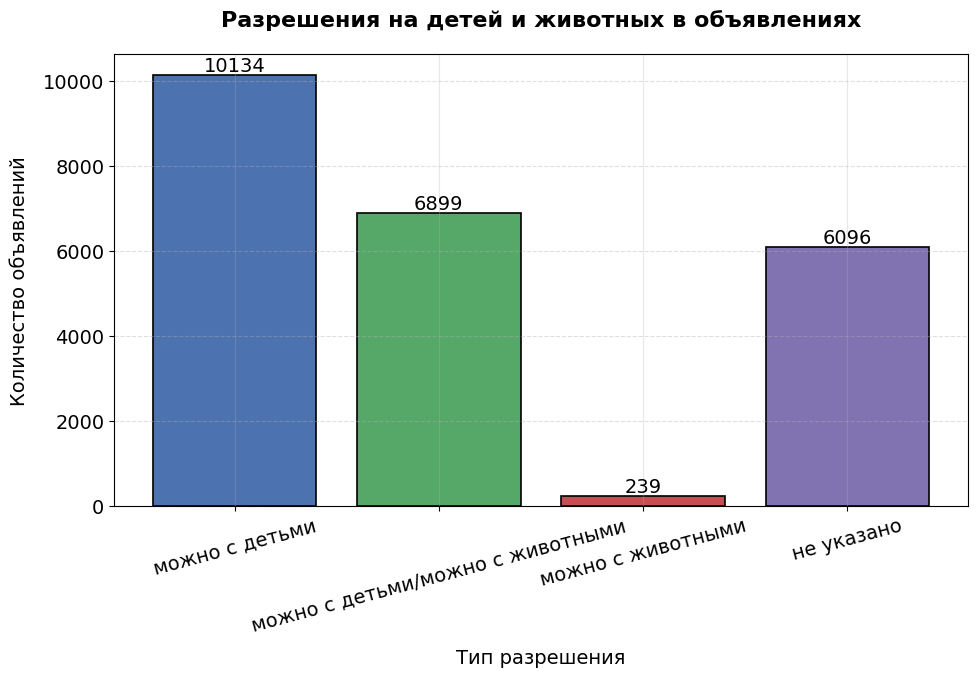

In [54]:
# Анализ столбца "Можно с детьми/животными" 

# Создаем фигуру
plt.figure(figsize=(10, 7))

# Устанавливаем стиль
plt.style.use('default')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Анализируем данные
categories = {
    'можно с детьми': df['Можно с детьми/животными'].str.contains('можно с детьми', case=False, na=False) & 
                     ~df['Можно с детьми/животными'].str.contains('можно с животными', case=False, na=False),
    'можно с детьми/можно с животными': df['Можно с детьми/животными'].str.contains('можно с детьми.*можно с животными|можно с животными.*можно с детьми', case=False, na=False),
    'можно с животными': df['Можно с детьми/животными'].str.contains('можно с животными', case=False, na=False) & 
                        ~df['Можно с детьми/животными'].str.contains('можно с детьми', case=False, na=False),
    'не указано': df['Можно с детьми/животными'].isna()
}

# Считаем количество
counts = {k: v.sum() for k, v in categories.items()}
names = list(counts.keys())
values = list(counts.values())

# Цветовая палитра
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Создаем гистограмму
bars = plt.bar(names, values, color=colors, edgecolor='black', linewidth=1.2)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.5,
             f'{height}',
             ha='center', va='bottom')

# Настраиваем график
plt.title('Разрешения на детей и животных в объявлениях', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Тип разрешения', labelpad=10)
plt.ylabel('Количество объявлений', labelpad=10)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Улучшаем отображение
plt.tight_layout()
plt.savefig('2.svg')
plt.show()


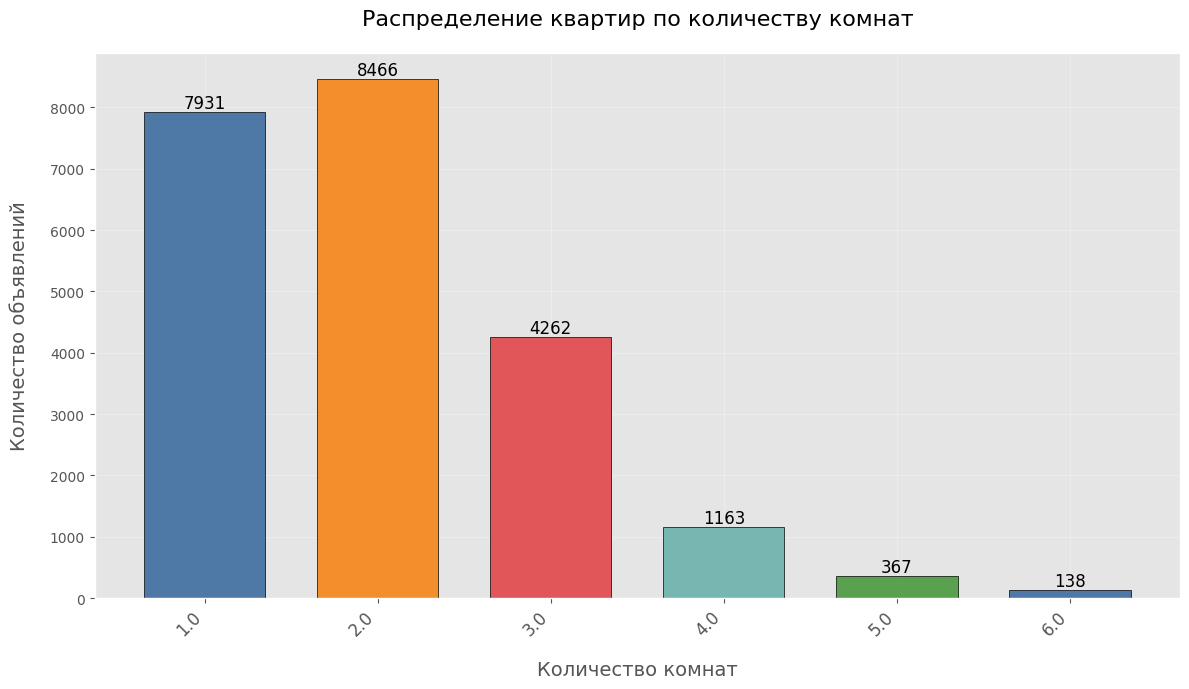

In [55]:
# Гистограмма кол-ва комнат 

# Функция для извлечения первой цифры
def extract_first_number(text):
    if pd.isna(text):
        return None
    for char in str(text):
        if char.isdigit():
            return int(char)
    return None

# Создаем фигуру с правильными отступами
plt.figure(figsize=(12, 7))
plt.subplots_adjust(bottom=0.2)  # Место для подписей

# Извлекаем количество комнат
df['Число комнат'] = df['Количество комнат'].apply(extract_first_number)
room_counts = df['Число комнат'].value_counts().sort_index()

# Стилизация
plt.style.use('ggplot')
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

# Рисуем столбцы
bars = plt.bar(
    room_counts.index.astype(str), 
    room_counts.values,
    color=colors,
    edgecolor='black',
    width=0.7
)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom',
             fontsize=12)

# Настройка осей
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Количество комнат', labelpad=15, fontsize=14)
plt.ylabel('Количество объявлений', labelpad=15, fontsize=14)
plt.title('Распределение квартир по количеству комнат', 
          pad=20, fontsize=16)

# Сетка и оформление
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('3.svg')
plt.show()
